In [ ]:
# STEP 1: Import Libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [ ]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape and normalize images
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Build a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes for digits 0-9
])


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.fit(x_train, y_train, epochs=3, validation_split=0.1)


Epoch 1/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 37s 21ms/step - accuracy: 0.8959 - loss: 0.3568 - val_accuracy: 0.9805 - val_loss: 0.0738
Epoch 2/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 36s 21ms/step - accuracy: 0.9798 - loss: 0.0675 - val_accuracy: 0.9813 - val_loss: 0.0642
Epoch 3/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.9866 - loss: 0.0428 - val_accuracy: 0.9840 - val_loss: 0.0589


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.2f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9760 - loss: 0.0732
Test accuracy: 0.98


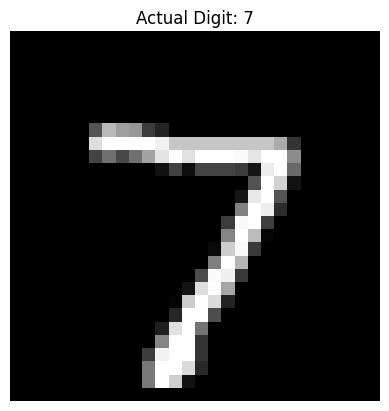

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
Predicted Digit: 7


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Pick one image from test data
image_index = 0  # you can change the number
img = x_test[image_index]

# Show the image
plt.imshow(img.reshape(28,28), cmap='gray')
plt.title("Actual Digit: " + str(y_test[image_index]))
plt.axis('off')
plt.show()

# Predict using the model
prediction = model.predict(np.expand_dims(img, axis=0))
predicted_digit = np.argmax(prediction)
print("Predicted Digit:", predicted_digit)
